In [1]:
import warnings
warnings.simplefilter('ignore')

In [2]:
from datetime import datetime
from datetime import timedelta

In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

In [5]:
data = pd.read_csv('retail.csv')
data

,Unnamed: 0,purchdate,amount,mcc,mrchcity,mrchname,cnum,sets,store_name
0,0,2019-09-17,788.80,5411,MOSCOW,1LJXKW7J 1NKWJ1KK,PTMKRN,2,eurospar
1,1,2019-09-17,621.14,5411,MOSCOW,T3LKT4HH M56B 5,2CDFHG,2,вкусвилл
2,2,2019-09-17,452.76,5411,MOSCOW,T3LKT4HH M56B 5,BGYOGO,2,вкусвилл
3,3,2019-09-17,458.00,5411,MOSCOW,T3LKT4HH M56B 5,2CDCFY,2,вкусвилл
4,4,2019-09-17,196.00,5411,MOSCOW,T3LKT4HH M56B 5,0OYSXY,2,вкусвилл
...,...,...,...,...,...,...,...,...,...
5636819,5636819,2019-12-16,2098.85,5411,MOSCOW,WO7E1JXIA37,ELEEKS,14,пятерочка
5636820,5636820,2019-12-16,423.91,5411,MOSCOW,WO7E1JXIA37,EL4S4S,14,пятерочка
5636821,5636821,2019-12-16,588.75,5411,MOSCOW,WO7E1JXIA37,KSNCSY,14,пятерочка
5636822,5636822,2019-12-16,91.33,5411,MOSCOW,WO7E1JXIA37,ELOR8F,14,пятерочка


In [6]:
data = data.drop(['Unnamed: 0'], axis=1)
data

,purchdate,amount,mcc,mrchcity,mrchname,cnum,sets,store_name
0,2019-09-17,788.80,5411,MOSCOW,1LJXKW7J 1NKWJ1KK,PTMKRN,2,eurospar
1,2019-09-17,621.14,5411,MOSCOW,T3LKT4HH M56B 5,2CDFHG,2,вкусвилл
2,2019-09-17,452.76,5411,MOSCOW,T3LKT4HH M56B 5,BGYOGO,2,вкусвилл
3,2019-09-17,458.00,5411,MOSCOW,T3LKT4HH M56B 5,2CDCFY,2,вкусвилл
4,2019-09-17,196.00,5411,MOSCOW,T3LKT4HH M56B 5,0OYSXY,2,вкусвилл
...,...,...,...,...,...,...,...,...
5636819,2019-12-16,2098.85,5411,MOSCOW,WO7E1JXIA37,ELEEKS,14,пятерочка
5636820,2019-12-16,423.91,5411,MOSCOW,WO7E1JXIA37,EL4S4S,14,пятерочка
5636821,2019-12-16,588.75,5411,MOSCOW,WO7E1JXIA37,KSNCSY,14,пятерочка
5636822,2019-12-16,91.33,5411,MOSCOW,WO7E1JXIA37,ELOR8F,14,пятерочка


In [7]:
data = data.loc[data['amount'] < 25000.00]
data

,purchdate,amount,mcc,mrchcity,mrchname,cnum,sets,store_name
0,2019-09-17,788.80,5411,MOSCOW,1LJXKW7J 1NKWJ1KK,PTMKRN,2,eurospar
1,2019-09-17,621.14,5411,MOSCOW,T3LKT4HH M56B 5,2CDFHG,2,вкусвилл
2,2019-09-17,452.76,5411,MOSCOW,T3LKT4HH M56B 5,BGYOGO,2,вкусвилл
3,2019-09-17,458.00,5411,MOSCOW,T3LKT4HH M56B 5,2CDCFY,2,вкусвилл
4,2019-09-17,196.00,5411,MOSCOW,T3LKT4HH M56B 5,0OYSXY,2,вкусвилл
...,...,...,...,...,...,...,...,...
5636819,2019-12-16,2098.85,5411,MOSCOW,WO7E1JXIA37,ELEEKS,14,пятерочка
5636820,2019-12-16,423.91,5411,MOSCOW,WO7E1JXIA37,EL4S4S,14,пятерочка
5636821,2019-12-16,588.75,5411,MOSCOW,WO7E1JXIA37,KSNCSY,14,пятерочка
5636822,2019-12-16,91.33,5411,MOSCOW,WO7E1JXIA37,ELOR8F,14,пятерочка


In [8]:
others = data.loc[data['store_name'] != 'лента']
others

,purchdate,amount,mcc,mrchcity,mrchname,cnum,sets,store_name
0,2019-09-17,788.80,5411,MOSCOW,1LJXKW7J 1NKWJ1KK,PTMKRN,2,eurospar
1,2019-09-17,621.14,5411,MOSCOW,T3LKT4HH M56B 5,2CDFHG,2,вкусвилл
2,2019-09-17,452.76,5411,MOSCOW,T3LKT4HH M56B 5,BGYOGO,2,вкусвилл
3,2019-09-17,458.00,5411,MOSCOW,T3LKT4HH M56B 5,2CDCFY,2,вкусвилл
4,2019-09-17,196.00,5411,MOSCOW,T3LKT4HH M56B 5,0OYSXY,2,вкусвилл
...,...,...,...,...,...,...,...,...
5636819,2019-12-16,2098.85,5411,MOSCOW,WO7E1JXIA37,ELEEKS,14,пятерочка
5636820,2019-12-16,423.91,5411,MOSCOW,WO7E1JXIA37,EL4S4S,14,пятерочка
5636821,2019-12-16,588.75,5411,MOSCOW,WO7E1JXIA37,KSNCSY,14,пятерочка
5636822,2019-12-16,91.33,5411,MOSCOW,WO7E1JXIA37,ELOR8F,14,пятерочка


In [9]:
others = others.drop(['purchdate', 'mcc'], axis=1)
others

,amount,mrchcity,mrchname,cnum,sets,store_name
0,788.80,MOSCOW,1LJXKW7J 1NKWJ1KK,PTMKRN,2,eurospar
1,621.14,MOSCOW,T3LKT4HH M56B 5,2CDFHG,2,вкусвилл
2,452.76,MOSCOW,T3LKT4HH M56B 5,BGYOGO,2,вкусвилл
3,458.00,MOSCOW,T3LKT4HH M56B 5,2CDCFY,2,вкусвилл
4,196.00,MOSCOW,T3LKT4HH M56B 5,0OYSXY,2,вкусвилл
...,...,...,...,...,...,...
5636819,2098.85,MOSCOW,WO7E1JXIA37,ELEEKS,14,пятерочка
5636820,423.91,MOSCOW,WO7E1JXIA37,EL4S4S,14,пятерочка
5636821,588.75,MOSCOW,WO7E1JXIA37,KSNCSY,14,пятерочка
5636822,91.33,MOSCOW,WO7E1JXIA37,ELOR8F,14,пятерочка


In [10]:
others = others.reset_index(drop=True)
others

,amount,mrchcity,mrchname,cnum,sets,store_name
0,788.80,MOSCOW,1LJXKW7J 1NKWJ1KK,PTMKRN,2,eurospar
1,621.14,MOSCOW,T3LKT4HH M56B 5,2CDFHG,2,вкусвилл
2,452.76,MOSCOW,T3LKT4HH M56B 5,BGYOGO,2,вкусвилл
3,458.00,MOSCOW,T3LKT4HH M56B 5,2CDCFY,2,вкусвилл
4,196.00,MOSCOW,T3LKT4HH M56B 5,0OYSXY,2,вкусвилл
...,...,...,...,...,...,...
5586399,2098.85,MOSCOW,WO7E1JXIA37,ELEEKS,14,пятерочка
5586400,423.91,MOSCOW,WO7E1JXIA37,EL4S4S,14,пятерочка
5586401,588.75,MOSCOW,WO7E1JXIA37,KSNCSY,14,пятерочка
5586402,91.33,MOSCOW,WO7E1JXIA37,ELOR8F,14,пятерочка


In [11]:
others_final = pd.DataFrame()
others_final['cnum'] = others.cnum.value_counts().index
others_final

,cnum
0,E4T4U2
1,JQRMRQ
2,E4FMYS
3,E4HB9J
4,MKMNML
...,...
324948,E4TDED
324949,EE77E5
324950,E46ZCH
324951,ELKDX9


In [12]:
# 2
tmp = pd.DataFrame(others.loc[others['sets'] == 2]).groupby('cnum').agg(
    com_ava_2 = ('amount', lambda x: sum(x) / len(x)),
    com_freq_2 = ('amount', len)
)
others_final = pd.merge(others_final, tmp, on='cnum', how='left')
# 3
tmp = pd.DataFrame(others.loc[others['sets'] == 3]).groupby('cnum').agg(
    com_ava_3 = ('amount', lambda x: sum(x) / len(x)),
    com_freq_3 = ('amount', len)
)
others_final = pd.merge(others_final, tmp, on='cnum', how='left')
# 4
tmp = pd.DataFrame(others.loc[others['sets'] == 4]).groupby('cnum').agg(
    com_ava_4 = ('amount', lambda x: sum(x) / len(x)),
    com_freq_4 = ('amount', len)
)
others_final = pd.merge(others_final, tmp, on='cnum', how='left')
# 5
tmp = pd.DataFrame(others.loc[others['sets'] == 5]).groupby('cnum').agg(
    com_ava_5 = ('amount', lambda x: sum(x) / len(x)),
    com_freq_5 = ('amount', len)
)
others_final = pd.merge(others_final, tmp, on='cnum', how='left')
# 6
tmp = pd.DataFrame(others.loc[others['sets'] == 6]).groupby('cnum').agg(
    com_ava_6 = ('amount', lambda x: sum(x) / len(x)),
    com_freq_6 = ('amount', len)
)
others_final = pd.merge(others_final, tmp, on='cnum', how='left')
# 7
tmp = pd.DataFrame(others.loc[others['sets'] == 7]).groupby('cnum').agg(
    com_ava_7 = ('amount', lambda x: sum(x) / len(x)),
    com_freq_7 = ('amount', len)
)
others_final = pd.merge(others_final, tmp, on='cnum', how='left')
# 8
tmp = pd.DataFrame(others.loc[others['sets'] == 8]).groupby('cnum').agg(
    com_ava_8 = ('amount', lambda x: sum(x) / len(x)),
    com_freq_8 = ('amount', len)
)
others_final = pd.merge(others_final, tmp, on='cnum', how='left')
# 9
tmp = pd.DataFrame(others.loc[others['sets'] == 9]).groupby('cnum').agg(
    com_ava_9 = ('amount', lambda x: sum(x) / len(x)),
    com_freq_9 = ('amount', len)
)
others_final = pd.merge(others_final, tmp, on='cnum', how='left')
# 10
tmp = pd.DataFrame(others.loc[others['sets'] == 10]).groupby('cnum').agg(
    com_ava_10 = ('amount', lambda x: sum(x) / len(x)),
    com_freq_10 = ('amount', len)
)
others_final = pd.merge(others_final, tmp, on='cnum', how='left')
# 11
tmp = pd.DataFrame(others.loc[others['sets'] == 11]).groupby('cnum').agg(
    com_ava_11 = ('amount', lambda x: sum(x) / len(x)),
    com_freq_11 = ('amount', len)
)
others_final = pd.merge(others_final, tmp, on='cnum', how='left')
# 12
tmp = pd.DataFrame(others.loc[others['sets'] == 12]).groupby('cnum').agg(
    com_ava_12 = ('amount', lambda x: sum(x) / len(x)),
    com_freq_12 = ('amount', len)
)
others_final = pd.merge(others_final, tmp, on='cnum', how='left')
# 13
tmp = pd.DataFrame(others.loc[others['sets'] == 13]).groupby('cnum').agg(
    com_ava_13 = ('amount', lambda x: sum(x) / len(x)),
    com_freq_13 = ('amount', len)
)
others_final = pd.merge(others_final, tmp, on='cnum', how='left')
# 14
tmp = pd.DataFrame(others.loc[others['sets'] == 14]).groupby('cnum').agg(
    com_ava_14 = ('amount', lambda x: sum(x) / len(x)),
    com_freq_14 = ('amount', len)
)
others_final = pd.merge(others_final, tmp, on='cnum', how='left')
others_final

,cnum,com_ava_2,com_freq_2,com_ava_3,com_freq_3,com_ava_4,com_freq_4,com_ava_5,com_freq_5,com_ava_6,...,com_ava_10,com_freq_10,com_ava_11,com_freq_11,com_ava_12,com_freq_12,com_ava_13,com_freq_13,com_ava_14,com_freq_14
0,E4T4U2,31.438871,62.0,54.259016,61.0,49.233585,53.0,46.595610,41.0,47.501091,...,69.341892,37.0,73.249412,34.0,40.301961,51.0,45.458909,55.0,31.276809,47.0
1,JQRMRQ,320.643636,33.0,234.452222,27.0,314.609697,33.0,282.305135,37.0,164.527692,...,248.740750,40.0,211.396667,36.0,260.011613,31.0,415.090909,11.0,298.680000,10.0
2,E4FMYS,77.782727,44.0,97.336000,40.0,95.333714,35.0,85.273488,43.0,149.521600,...,98.719583,24.0,49.580000,7.0,79.951667,36.0,119.057857,14.0,338.862500,4.0
3,E4HB9J,80.368864,44.0,81.960385,26.0,72.337407,27.0,61.149677,31.0,89.957692,...,130.594783,23.0,69.541176,34.0,148.422333,30.0,71.627500,24.0,124.705263,19.0
4,MKMNML,415.677200,25.0,489.457000,30.0,363.195357,28.0,378.350000,28.0,557.296667,...,497.621111,27.0,619.572500,32.0,423.154103,39.0,378.943600,25.0,503.624706,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324948,E4TDED,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,129.130000,1.0,NaN,NaN,NaN,NaN,NaN,NaN
324949,EE77E5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2274.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324950,E46ZCH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,184.370000,1.0,NaN,NaN,NaN,NaN,NaN,NaN
324951,ELKDX9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
others_final = others_final.fillna(0)

In [14]:
others_final['Summa'] = others_final['com_freq_2'] + others_final['com_freq_3'] + others_final['com_freq_4'] + others_final['com_freq_5'] + others_final['com_freq_6'] + others_final['com_freq_7'] + others_final['com_freq_8'] + others_final['com_freq_9'] + others_final['com_freq_10'] + others_final['com_freq_11'] + others_final['com_freq_12'] + others_final['com_freq_13'] + others_final['com_freq_14']
others_final = others_final.loc[others_final['Summa']>5]
others_final

,cnum,com_ava_2,com_freq_2,com_ava_3,com_freq_3,com_ava_4,com_freq_4,com_ava_5,com_freq_5,com_ava_6,...,com_freq_10,com_ava_11,com_freq_11,com_ava_12,com_freq_12,com_ava_13,com_freq_13,com_ava_14,com_freq_14,Summa
0,E4T4U2,31.438871,62.0,54.259016,61.0,49.233585,53.0,46.595610,41.0,47.501091,...,37.0,73.249412,34.0,40.301961,51.0,45.458909,55.0,31.276809,47.0,644.0
1,JQRMRQ,320.643636,33.0,234.452222,27.0,314.609697,33.0,282.305135,37.0,164.527692,...,40.0,211.396667,36.0,260.011613,31.0,415.090909,11.0,298.680000,10.0,374.0
2,E4FMYS,77.782727,44.0,97.336000,40.0,95.333714,35.0,85.273488,43.0,149.521600,...,24.0,49.580000,7.0,79.951667,36.0,119.057857,14.0,338.862500,4.0,361.0
3,E4HB9J,80.368864,44.0,81.960385,26.0,72.337407,27.0,61.149677,31.0,89.957692,...,23.0,69.541176,34.0,148.422333,30.0,71.627500,24.0,124.705263,19.0,358.0
4,MKMNML,415.677200,25.0,489.457000,30.0,363.195357,28.0,378.350000,28.0,557.296667,...,27.0,619.572500,32.0,423.154103,39.0,378.943600,25.0,503.624706,17.0,350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191761,EE85ZG,0.000000,0.0,0.000000,0.0,1578.930000,1.0,497.500000,1.0,416.500000,...,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,6.0
191762,JJLNQI,0.000000,0.0,0.000000,0.0,0.000000,0.0,329.970000,1.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,6.0
191763,ELOSDL,0.000000,0.0,0.000000,0.0,0.000000,0.0,174.800000,1.0,90.243333,...,0.0,1199.800000,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,6.0
191764,LKJQPT,0.000000,0.0,0.000000,0.0,326.330000,1.0,0.000000,0.0,351.780000,...,1.0,686.350000,1.0,0.000000,0.0,0.000000,0.0,424.700000,1.0,6.0


In [15]:
clients = data.loc[data['store_name'] == 'лента']
clients

,purchdate,amount,mcc,mrchcity,mrchname,cnum,sets,store_name
157,2019-09-17,1042.0,5411,MOSCOW,E3 H1DE7-FFP,ELYSTP,2,лента
158,2019-09-17,144.0,5411,MOSCOW,E3 H1DE7-FFP,ELHM7X,2,лента
159,2019-09-17,364.0,5411,MOSCOW,E3 H1DE7-FFP,EL0OCU,2,лента
160,2019-09-17,180.0,5411,MOSCOW,E3 H1DE7-FFP,ELL9X4,2,лента
161,2019-09-17,383.0,5411,MOSCOW,E3 H1DE7-FFP,E46TL1,2,лента
...,...,...,...,...,...,...,...,...
5634532,2019-12-16,2076.0,5411,MOSCOW,H1DE7-FGM,IFXYYC,14,лента
5634533,2019-12-16,11.0,5411,MOSCOW,H1DE7-FGM,EL2NB1,14,лента
5634534,2019-12-16,1072.0,5411,MOSCOW,H1DE7-FGM,MKMJTQ,14,лента
5634535,2019-12-16,1096.0,5411,MOSCOW,H1DE7-FGM,JNTTMI,14,лента


In [16]:
clients = clients.drop(['purchdate', 'mcc'], axis=1)
clients

,amount,mrchcity,mrchname,cnum,sets,store_name
157,1042.0,MOSCOW,E3 H1DE7-FFP,ELYSTP,2,лента
158,144.0,MOSCOW,E3 H1DE7-FFP,ELHM7X,2,лента
159,364.0,MOSCOW,E3 H1DE7-FFP,EL0OCU,2,лента
160,180.0,MOSCOW,E3 H1DE7-FFP,ELL9X4,2,лента
161,383.0,MOSCOW,E3 H1DE7-FFP,E46TL1,2,лента
...,...,...,...,...,...,...
5634532,2076.0,MOSCOW,H1DE7-FGM,IFXYYC,14,лента
5634533,11.0,MOSCOW,H1DE7-FGM,EL2NB1,14,лента
5634534,1072.0,MOSCOW,H1DE7-FGM,MKMJTQ,14,лента
5634535,1096.0,MOSCOW,H1DE7-FGM,JNTTMI,14,лента


In [17]:
clients = clients.reset_index(drop=True)
clients

,amount,mrchcity,mrchname,cnum,sets,store_name
0,1042.0,MOSCOW,E3 H1DE7-FFP,ELYSTP,2,лента
1,144.0,MOSCOW,E3 H1DE7-FFP,ELHM7X,2,лента
2,364.0,MOSCOW,E3 H1DE7-FFP,EL0OCU,2,лента
3,180.0,MOSCOW,E3 H1DE7-FFP,ELL9X4,2,лента
4,383.0,MOSCOW,E3 H1DE7-FFP,E46TL1,2,лента
...,...,...,...,...,...,...
48924,2076.0,MOSCOW,H1DE7-FGM,IFXYYC,14,лента
48925,11.0,MOSCOW,H1DE7-FGM,EL2NB1,14,лента
48926,1072.0,MOSCOW,H1DE7-FGM,MKMJTQ,14,лента
48927,1096.0,MOSCOW,H1DE7-FGM,JNTTMI,14,лента


In [18]:
clients_final = pd.DataFrame()
clients_final['cnum'] = clients.cnum.value_counts().index
clients_final

,cnum
0,KLQIIQ
1,ELFNTE
2,ELHQHQ
3,E4TIGR
4,ANXSYF
...,...
13887,EL0CPF
13888,EXYYHF
13889,ELE25A
13890,EE5G7A


In [19]:
# 2
tmp = pd.DataFrame(clients.loc[clients['sets'] == 2]).groupby('cnum').agg(
    cl_ava_2 = ('amount', lambda x: sum(x) / len(x)),
    cl_freq_2 = ('amount', len)
)
clients_final = pd.merge(clients_final, tmp, on='cnum', how='left')
# 3
tmp = pd.DataFrame(clients.loc[clients['sets'] == 3]).groupby('cnum').agg(
    cl_ava_3 = ('amount', lambda x: sum(x) / len(x)),
    cl_freq_3 = ('amount', len)
)
clients_final = pd.merge(clients_final, tmp, on='cnum', how='left')
# 4
tmp = pd.DataFrame(clients.loc[clients['sets'] == 4]).groupby('cnum').agg(
    cl_ava_4 = ('amount', lambda x: sum(x) / len(x)),
    cl_freq_4 = ('amount', len)
)
clients_final = pd.merge(clients_final, tmp, on='cnum', how='left')
# 5
tmp = pd.DataFrame(clients.loc[clients['sets'] == 5]).groupby('cnum').agg(
    cl_ava_5 = ('amount', lambda x: sum(x) / len(x)),
    cl_freq_5 = ('amount', len)
)
clients_final = pd.merge(clients_final, tmp, on='cnum', how='left')
# 6
tmp = pd.DataFrame(clients.loc[clients['sets'] == 6]).groupby('cnum').agg(
    cl_ava_6 = ('amount', lambda x: sum(x) / len(x)),
    cl_freq_6 = ('amount', len)
)
clients_final = pd.merge(clients_final, tmp, on='cnum', how='left')
# 7
tmp = pd.DataFrame(clients.loc[clients['sets'] == 7]).groupby('cnum').agg(
    cl_ava_7 = ('amount', lambda x: sum(x) / len(x)),
    cl_freq_7 = ('amount', len)
)
clients_final = pd.merge(clients_final, tmp, on='cnum', how='left')
# 8
tmp = pd.DataFrame(clients.loc[clients['sets'] == 8]).groupby('cnum').agg(
    cl_ava_8 = ('amount', lambda x: sum(x) / len(x)),
    cl_freq_8 = ('amount', len)
)
clients_final = pd.merge(clients_final, tmp, on='cnum', how='left')
# 9
tmp = pd.DataFrame(clients.loc[clients['sets'] == 9]).groupby('cnum').agg(
    cl_ava_9 = ('amount', lambda x: sum(x) / len(x)),
    cl_freq_9 = ('amount', len)
)
clients_final = pd.merge(clients_final, tmp, on='cnum', how='left')
# 10
tmp = pd.DataFrame(clients.loc[clients['sets'] == 10]).groupby('cnum').agg(
    cl_ava_10 = ('amount', lambda x: sum(x) / len(x)),
    cl_freq_10 = ('amount', len)
)
clients_final = pd.merge(clients_final, tmp, on='cnum', how='left')
# 11
tmp = pd.DataFrame(clients.loc[clients['sets'] == 11]).groupby('cnum').agg(
    cl_ava_11 = ('amount', lambda x: sum(x) / len(x)),
    cl_freq_11 = ('amount', len)
)
clients_final = pd.merge(clients_final, tmp, on='cnum', how='left')
# 12
tmp = pd.DataFrame(clients.loc[clients['sets'] == 12]).groupby('cnum').agg(
    cl_ava_12 = ('amount', lambda x: sum(x) / len(x)),
    cl_freq_12 = ('amount', len)
)
clients_final = pd.merge(clients_final, tmp, on='cnum', how='left')
# 13
tmp = pd.DataFrame(clients.loc[clients['sets'] == 13]).groupby('cnum').agg(
    cl_ava_13 = ('amount', lambda x: sum(x) / len(x)),
    cl_freq_13 = ('amount', len)
)
clients_final = pd.merge(clients_final, tmp, on='cnum', how='left')
# 14
tmp = pd.DataFrame(clients.loc[clients['sets'] == 14]).groupby('cnum').agg(
    cl_ava_14 = ('amount', lambda x: sum(x) / len(x)),
    cl_freq_14 = ('amount', len)
)
clients_final = pd.merge(clients_final, tmp, on='cnum', how='left')
clients_final

,cnum,cl_ava_2,cl_freq_2,cl_ava_3,cl_freq_3,cl_ava_4,cl_freq_4,cl_ava_5,cl_freq_5,cl_ava_6,...,cl_ava_10,cl_freq_10,cl_ava_11,cl_freq_11,cl_ava_12,cl_freq_12,cl_ava_13,cl_freq_13,cl_ava_14,cl_freq_14
0,KLQIIQ,206.000000,10.0,97.666667,3.0,103.800000,15.0,103.789474,19.0,134.250000,...,219.666667,6.0,122.142857,7.0,118.083333,12.0,NaN,NaN,NaN,NaN
1,ELFNTE,148.000000,15.0,169.777778,9.0,69.666667,3.0,NaN,NaN,53.545455,...,143.400000,10.0,225.600000,10.0,189.875000,8.0,190.250000,8.0,119.666667,3.0
2,ELHQHQ,531.714286,7.0,203.375000,8.0,391.285714,7.0,304.142857,7.0,287.444444,...,203.166667,6.0,266.666667,6.0,415.000000,4.0,288.700000,10.0,526.000000,4.0
3,E4TIGR,497.800000,5.0,385.285714,7.0,308.400000,5.0,503.571429,7.0,287.500000,...,298.666667,9.0,353.000000,10.0,524.000000,3.0,159.571429,7.0,355.300000,10.0
4,ANXSYF,1650.000000,4.0,3564.000000,3.0,NaN,NaN,2707.000000,1.0,569.714286,...,2884.666667,3.0,3197.333333,3.0,1062.583333,12.0,1012.466667,15.0,2682.750000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13887,EL0CPF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.000000,1.0
13888,EXYYHF,NaN,NaN,3222.000000,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13889,ELE25A,NaN,NaN,382.000000,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13890,EE5G7A,NaN,NaN,NaN,NaN,156.000000,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
clients_final = clients_final.fillna(0)

In [21]:
clients_final['Summa'] = clients_final['cl_freq_2'] + clients_final['cl_freq_3'] + clients_final['cl_freq_4'] + clients_final['cl_freq_5'] + clients_final['cl_freq_6'] + clients_final['cl_freq_7'] + clients_final['cl_freq_8'] + clients_final['cl_freq_9'] + clients_final['cl_freq_10'] + clients_final['cl_freq_11'] + clients_final['cl_freq_12'] + clients_final['cl_freq_13'] + clients_final['cl_freq_14']
clients_final = clients_final.loc[clients_final['Summa']>5]
clients_final

,cnum,cl_ava_2,cl_freq_2,cl_ava_3,cl_freq_3,cl_ava_4,cl_freq_4,cl_ava_5,cl_freq_5,cl_ava_6,...,cl_freq_10,cl_ava_11,cl_freq_11,cl_ava_12,cl_freq_12,cl_ava_13,cl_freq_13,cl_ava_14,cl_freq_14,Summa
0,KLQIIQ,206.000000,10.0,97.666667,3.0,103.800000,15.0,103.789474,19.0,134.250000,...,6.0,122.142857,7.0,118.083333,12.0,0.000000,0.0,0.000000,0.0,107.0
1,ELFNTE,148.000000,15.0,169.777778,9.0,69.666667,3.0,0.000000,0.0,53.545455,...,10.0,225.600000,10.0,189.875000,8.0,190.250000,8.0,119.666667,3.0,97.0
2,ELHQHQ,531.714286,7.0,203.375000,8.0,391.285714,7.0,304.142857,7.0,287.444444,...,6.0,266.666667,6.0,415.000000,4.0,288.700000,10.0,526.000000,4.0,88.0
3,E4TIGR,497.800000,5.0,385.285714,7.0,308.400000,5.0,503.571429,7.0,287.500000,...,9.0,353.000000,10.0,524.000000,3.0,159.571429,7.0,355.300000,10.0,80.0
4,ANXSYF,1650.000000,4.0,3564.000000,3.0,0.000000,0.0,2707.000000,1.0,569.714286,...,3.0,3197.333333,3.0,1062.583333,12.0,1012.466667,15.0,2682.750000,4.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2150,E4DK4X,1019.000000,1.0,1436.000000,1.0,0.000000,0.0,2306.000000,1.0,275.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,6.0
2151,E4PG1L,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.0,6109.000000,1.0,5702.000000,1.0,5290.000000,1.0,2460.000000,2.0,6.0
2152,EEZTTG,0.000000,0.0,0.000000,0.0,425.000000,1.0,554.500000,2.0,0.000000,...,0.0,0.000000,0.0,566.000000,1.0,0.000000,0.0,0.000000,0.0,6.0
2153,ESNSSN,1386.000000,1.0,0.000000,0.0,0.000000,0.0,2131.000000,1.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,4097.000000,1.0,0.000000,0.0,6.0


In [22]:
all_final = clients_final.merge(others_final, on='cnum', how='inner')

In [23]:
all_final.columns

Index(['cnum', 'cl_ava_2', 'cl_freq_2', 'cl_ava_3', 'cl_freq_3', 'cl_ava_4',
       'cl_freq_4', 'cl_ava_5', 'cl_freq_5', 'cl_ava_6', 'cl_freq_6',
       'cl_ava_7', 'cl_freq_7', 'cl_ava_8', 'cl_freq_8', 'cl_ava_9',
       'cl_freq_9', 'cl_ava_10', 'cl_freq_10', 'cl_ava_11', 'cl_freq_11',
       'cl_ava_12', 'cl_freq_12', 'cl_ava_13', 'cl_freq_13', 'cl_ava_14',
       'cl_freq_14', 'Summa_x', 'com_ava_2', 'com_freq_2', 'com_ava_3',
       'com_freq_3', 'com_ava_4', 'com_freq_4', 'com_ava_5', 'com_freq_5',
       'com_ava_6', 'com_freq_6', 'com_ava_7', 'com_freq_7', 'com_ava_8',
       'com_freq_8', 'com_ava_9', 'com_freq_9', 'com_ava_10', 'com_freq_10',
       'com_ava_11', 'com_freq_11', 'com_ava_12', 'com_freq_12', 'com_ava_13',
       'com_freq_13', 'com_ava_14', 'com_freq_14', 'Summa_y'],
      dtype='object')

In [24]:
all_final = all_final.drop(['Summa_y', 'Summa_x'], axis=1)
all_final

,cnum,cl_ava_2,cl_freq_2,cl_ava_3,cl_freq_3,cl_ava_4,cl_freq_4,cl_ava_5,cl_freq_5,cl_ava_6,...,com_ava_10,com_freq_10,com_ava_11,com_freq_11,com_ava_12,com_freq_12,com_ava_13,com_freq_13,com_ava_14,com_freq_14
0,KLQIIQ,206.0,10.0,97.666667,3.0,103.800000,15.0,103.789474,19.0,134.250000,...,0.000000,0.0,0.000000,0.0,342.9700,1.0,0.000000,0.0,325.574000,5.0
1,ELFNTE,148.0,15.0,169.777778,9.0,69.666667,3.0,0.000000,0.0,53.545455,...,104.985000,2.0,159.386667,3.0,97.4850,2.0,59.990000,1.0,75.800000,1.0
2,E4TULN,0.0,0.0,0.000000,0.0,73.625000,8.0,69.750000,8.0,76.714286,...,0.000000,0.0,130.533333,3.0,0.0000,0.0,115.460000,5.0,75.000000,1.0
3,8OHYOS,211.5,4.0,894.000000,5.0,186.308571,7.0,152.000000,6.0,252.400000,...,39.990000,1.0,383.060000,1.0,247.3425,4.0,0.000000,0.0,1085.930000,1.0
4,ELQ4U1,441.2,5.0,283.250000,4.0,325.666667,6.0,337.333333,6.0,223.125000,...,161.273750,8.0,227.564000,5.0,107.4975,4.0,117.765000,2.0,142.300000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,EL9U7D,2243.0,2.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,3286.000000,...,1081.100000,1.0,0.000000,0.0,3171.0850,2.0,157.027500,8.0,1199.260000,2.0
1559,E4DK4X,1019.0,1.0,1436.000000,1.0,0.000000,0.0,2306.000000,1.0,275.000000,...,516.466667,3.0,996.140000,2.0,0.0000,0.0,0.000000,0.0,203.460000,1.0
1560,EEZTTG,0.0,0.0,0.000000,0.0,425.000000,1.0,554.500000,2.0,0.000000,...,451.552500,8.0,959.653333,3.0,724.8350,2.0,336.205000,2.0,442.798333,6.0
1561,ESNSSN,1386.0,1.0,0.000000,0.0,0.000000,0.0,2131.000000,1.0,0.000000,...,0.000000,0.0,0.000000,0.0,279.9800,1.0,0.000000,0.0,732.450000,2.0


In [28]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(all_final)

In [29]:
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

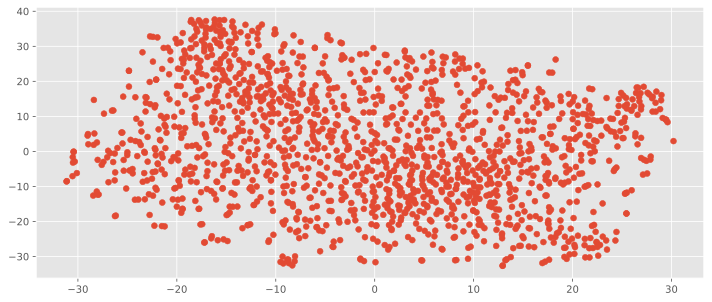

In [30]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

In [ ]:
all_final.to_csv('all_final.csv', index=False)

In [26]:
all_final = all_final.drop(['cnum'], axis=1)

In [27]:
all_final

,cl_ava_2,cl_freq_2,cl_ava_3,cl_freq_3,cl_ava_4,cl_freq_4,cl_ava_5,cl_freq_5,cl_ava_6,cl_freq_6,...,com_ava_10,com_freq_10,com_ava_11,com_freq_11,com_ava_12,com_freq_12,com_ava_13,com_freq_13,com_ava_14,com_freq_14
0,206.0,10.0,97.666667,3.0,103.800000,15.0,103.789474,19.0,134.250000,12.0,...,0.000000,0.0,0.000000,0.0,342.9700,1.0,0.000000,0.0,325.574000,5.0
1,148.0,15.0,169.777778,9.0,69.666667,3.0,0.000000,0.0,53.545455,11.0,...,104.985000,2.0,159.386667,3.0,97.4850,2.0,59.990000,1.0,75.800000,1.0
2,0.0,0.0,0.000000,0.0,73.625000,8.0,69.750000,8.0,76.714286,7.0,...,0.000000,0.0,130.533333,3.0,0.0000,0.0,115.460000,5.0,75.000000,1.0
3,211.5,4.0,894.000000,5.0,186.308571,7.0,152.000000,6.0,252.400000,5.0,...,39.990000,1.0,383.060000,1.0,247.3425,4.0,0.000000,0.0,1085.930000,1.0
4,441.2,5.0,283.250000,4.0,325.666667,6.0,337.333333,6.0,223.125000,8.0,...,161.273750,8.0,227.564000,5.0,107.4975,4.0,117.765000,2.0,142.300000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,2243.0,2.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,3286.000000,1.0,...,1081.100000,1.0,0.000000,0.0,3171.0850,2.0,157.027500,8.0,1199.260000,2.0
1559,1019.0,1.0,1436.000000,1.0,0.000000,0.0,2306.000000,1.0,275.000000,1.0,...,516.466667,3.0,996.140000,2.0,0.0000,0.0,0.000000,0.0,203.460000,1.0
1560,0.0,0.0,0.000000,0.0,425.000000,1.0,554.500000,2.0,0.000000,0.0,...,451.552500,8.0,959.653333,3.0,724.8350,2.0,336.205000,2.0,442.798333,6.0
1561,1386.0,1.0,0.000000,0.0,0.000000,0.0,2131.000000,1.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,279.9800,1.0,0.000000,0.0,732.450000,2.0


In [34]:
from sklearn.cluster import DBSCAN
from sklearn import preprocessing

eps = 0.55

normalized_X = preprocessing.normalize(all_final)
cl_dbscan1 = DBSCAN(eps=eps, min_samples=5, metric='euclidean', algorithm='ball_tree')
cl_dbscan1.fit(normalized_X)

DBSCAN(algorithm='ball_tree', eps=0.55)

In [35]:
pd.Series(cl_dbscan1.labels_).value_counts()

-1     998
 0     473
 6      14
 1      12
 10      9
 8       9
 11      8
 9       7
 5       7
 7       6
 12      5
 4       5
 3       5
 2       5
dtype: int64

In [36]:
final = all_final[['cl_ava_2','cl_freq_2']]
final

,cl_ava_2,cl_freq_2
0,206.0,10.0
1,148.0,15.0
2,0.0,0.0
3,211.5,4.0
4,441.2,5.0
...,...,...
1558,2243.0,2.0
1559,1019.0,1.0
1560,0.0,0.0
1561,1386.0,1.0


In [37]:
freqs = ['cl_freq_2', 'cl_freq_3', 'cl_freq_4', 'cl_freq_5', 'cl_freq_6', 'cl_freq_7', 'cl_freq_8', 'cl_freq_9', 'cl_freq_10', 'cl_freq_11', 'cl_freq_12', 'cl_freq_13', 'cl_freq_14']
n = 0
cl_n = []

for i in range(0, 1563):
    for j in range(0, len(freqs) - 1):
        if all_final[freqs[j]][i] > all_final[freqs[j + 1]][i]:
            n += 1
    cl_n.append(n)
    n = 0
all_final['ottok_check'] = cl_n
all_final.ottok_check.value_counts()

3    479
4    473
5    274
2    194
6     83
1     33
7     16
0     10
8      1
Name: ottok_check, dtype: int64

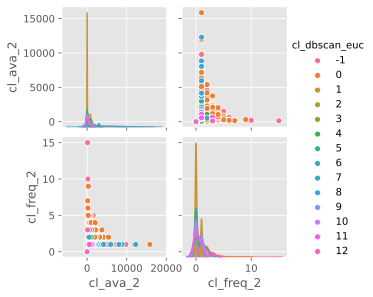

<Figure size 1080x648 with 0 Axes>

In [38]:
labels = list(final.columns)
final['cl_dbscan_euc'] = cl_dbscan1.labels_
sns.pairplot(vars=labels, hue='cl_dbscan_euc', height=2, data=final)
plt.figure(figsize=(15,9))
plt.show()